### Metas deste Notebook

- Particionar teste e treino
- Treinar modelos
- Avaliar modelos
- Utilizar Matriz de Confusão

In [2]:
import pandas as pd 
import numpy as np

In [3]:
data = pd.read_csv('ignores/feature_selection.csv')

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(data.iloc[:,:-1], data.iloc[:, -1])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
label = np.arange(1,56)

In [6]:
data = pd.read_csv('ignores/covtype.data', names=label, index_col=None)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test , y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.3,random_state=40)

In [9]:
model = DecisionTreeClassifier()

model.fit(x_train,y_train)

prediction = model.predict(data.iloc[:,:-1])

print(model.score(x_test,y_test))

0.934218377088


In [10]:
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt

In [11]:
confu = confusion_matrix(data.iloc[:,-1], prediction)

In [12]:
print(confu)

[[207543   3916      8      0     64     10    299]
 [  3828 278631    245      2    394    165     36]
 [     7    201  34968    103     41    434      0]
 [     0      0    106   2607      0     34      0]
 [    52    402     29      0   8996     13      1]
 [    20    211    430     45     10  16651      0]
 [   312     48      0      0      0      0  20150]]


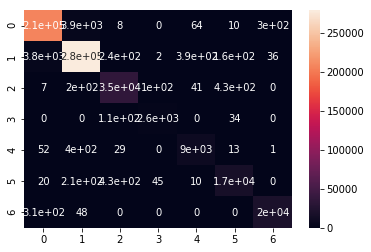

In [13]:
seaborn.heatmap(confu, annot=True)
plt.show()